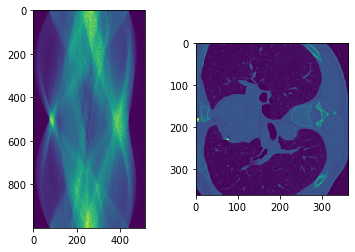

In [2]:
import dival.datasets.lodopab_dataset as lodopab

import matplotlib.pyplot as plt

dataset = lodopab.LoDoPaBDataset(impl='skimage')
sample_observ, sample_ground_truth = dataset.get_sample(1231)
plt.subplot(1, 2, 1)
plt.imshow(sample_observ)
plt.subplot(1, 2, 2)
plt.imshow(sample_ground_truth)

In [2]:
 dival.datasets.ellipses_dataset as ellipses


In [61]:
dataset2 = ellipses.EllipsesDataset(image_size=128, min_pt=None, max_pt=None,
                 train_len=32000, validation_len=3200, test_len=3200,
                 fixed_seeds=False)
b=dataset2.generator()
sampl=dataset2.get_len()

c = dataset2.get_sample(12222)
# sample_observ2, sample_ground_truth2 = dataset2.get_sample(1111)
# plt.subplot(1, 2, 1)
# plt.imshow(sample_observ)
# plt.subplot(1, 2, 2)
# plt.imshow(sample_ground_truth)

NotImplementedError: 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import sys as sys
from skimage.transform import resize

'''
Parameters given by the dataset
input: 1000*513
output: 362*362

train_len = 35820
validation_len = 3522
test_len = 3553

'''
class Net(nn.Module):
    """
    Defines a NN with 4 hidden layers with 200 nodes each. All layers are fully connected.
    Uses ReLu activation function after each layer.
    """
    def __init__(self):
        super(Net, self).__init__()
        #define each layer:
        self.inputlayer = nn.Linear(1000*513, 200, True)
        self.layer2 = nn.Linear(200,200, True)
        self.layer3 = nn.Linear(200, 200, True)
        self.layer4 = nn.Linear(200, 200, True)
        self.layer5 = nn.Linear(200, 362*362, True)


        
    def forward(self, inp):
        """
        Computes the output of the NN for the input inp. 
        Applies Layers and the activation function.
        """
        x = self.inputlayer(inp)
        x = F.relu(x)
        
        x = self.layer2(x)
        x = F.relu(x)
        
        x = self.layer3(x)
        x = F.relu(x)
        
        x = self.layer4(x)
        x = F.relu(x)
        
        x = self.layer5(x)
        x = F.relu(x)
        return x
    
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        
        self.CL1 = nn.Conv2d(1, 64, 3)
        self.PL1 = nn.MaxPool2d(2) #output ~ 250 x 500 x X
        
        self.CL2 = nn.Conv2d(64, 64, 3)
        self.PL2 = nn.MaxPool2d(2) #output ~ 120 x 250 x X
        
        self.CL3 = nn.Conv2d(64, 128, 3)
        self.PL3 = nn.MaxPool2d(2) #output ~ 60 x 120 x X
        
        self.CL4 = nn.Conv2d(128, 128, 3)
        self.PL4 = nn.MaxPool2d(2) #output torch.Size([1, X, 61, 31])
        
        self.CL5 = nn.Conv2d(128, 256, 3)
        self.PL5 = nn.MaxPool2d(2) #torch.Size([1, X, 30, 15])
        
        self.CL6 = nn.Conv2d(256, 256, 3)
        self.PL6 = nn.MaxPool2d(2) #torch.Size([1, 16, 14, 7])
        
        #self.CL7 = nn.Conv2d(256, 256, 2)
        #self.PL7 = nn.MaxPool2d(2) #torch.Size([1, X, 6, 3])

        
        self.Layer8 = nn.Linear(256*13*6, 362*362)
                                
        
    def forward(self, inp): #inp is a vector of inputsize
        x = inp.reshape(1,1,1000,513)
        
        x = F.relu(self.CL1(x))
        x = self.PL1(x)
        
        x = F.relu(self.CL2(x))
        x = self.PL2(x)
        
        x = F.relu(self.CL3(x))
        x = self.PL3(x)
        
        x = F.relu(self.CL4(x))
        x = self.PL4(x)
        #torch.Size([1, 128, 61, 31])
        x = F.relu(self.CL5(x))
        x = self.PL5(x)
        
        x = F.relu(self.CL6(x))
        x = self.PL6(x)
        
        #x = F.relu(self.CL7(x))
        #x = self.PL7(x)
        
        x = x.reshape(256*13*6)
        x = self.Layer8(x)
        x = nn.Sigmoid()(x)
        
        return x
        


    
    
#mynet = Net()
mynet2 = Net2()
#print(mynet2)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
#print(sys.getsizeof(mynet2))

cpu


/afs/math.uni-hamburg.de/users/stud/baw4310/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import sys as sys
from skimage.transform import resize

class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        #U-net from https://arxiv.org/pdf/1505.04597v1.pdf, 1 down less
        self.conv1 = nn.Conv2d(1, 64, 3)
        self.conv2 = nn.Conv2d(64, 64, 3)
        self.down1 = nn.MaxPool2d(2)
        
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.conv4 = nn.Conv2d(128, 128, 3)
        self.down2 = nn.MaxPool2d(2)
        
        self.conv5 = nn.Conv2d(128, 256, 3)
        self.conv6 = nn.Conv2d(256, 256, 3)
        self.down3 = nn.MaxPool2d(2)
        
        self.conv7 = nn.Conv2d(256, 512, 3)
        self.conv8 = nn.Conv2d(512, 512, 3)
        self.up1 = nn.ConvTranspose2d(512, 256, 3, stride=2)
        
        self.conv9 = nn.Conv2d(512, 256, 3)
        self.conv10 = nn.Conv2d(256, 256, 3)
        self.up2 = nn.ConvTranspose2d(256, 128, 3, stride=2)
        
        self.conv11 = nn.Conv2d(256, 128, 3)
        self.conv12 = nn.Conv2d(128, 128, 3)
        
        self.conv13 = nn.Conv2d(128, 1, 1)
        self.down4 = nn.MaxPool2d(2)
        self.lin = nn.Linear(229*107,362**2)
        
        self.skip1 = nn.Conv2d(256,256,1)
        self.skip2 = nn.Conv2d(128,128,1)

    def forward(self, inp):
        x = inp.reshape(1,1,1000,513)
        
        x = F.relu(self.conv1(x)) # 1 x 64 x 998 x 511
        x = F.relu(self.conv2(x)) # 1 x 64 x 996 x 509
        y = self.down1(x) # 1 x 64 x 498 x 254
        
        y = F.relu(self.conv3(y)) # 1 x 128 x 496 x 252
        y = F.relu(self.conv4(y)) # 1 x 128 x 494 x 250
        z = self.down1(y) # 1 x 128 x 247 x 125 
        
        z = F.relu(self.conv5(z)) # 1 x 256 x 245 x 123
        z = F.relu(self.conv6(z)) # 1 x 256 x 243 x 121
        a = self.down1(z) # 1 x 256 x 121 x 60
        
        a = F.relu(self.conv7(a)) # 1 x 512 x 119 x 58
        a = F.relu(self.conv8(a)) # 1 x 512 x 117 x 56
        a = self.up1(a) # 1 x 256 x 235 x 113
        z = torch.cat( (a, self.skip1(z[:,:,4:-4,4:-4])) , 1) # 1 x 512 x 235 x113
        
        z = F.relu(self.conv9(z)) # 1 x 256 x 233 x 111
        z = F.relu(self.conv10(z)) # 1 x 256 x 231 x 109
        z = self.up2(z) # 1 x 128 x 463 x 219
        y = torch.cat( (z, self.skip2(y[:,:,15:-16,15:-16])) , 1) # !!!!!!
        
        y = F.relu(self.conv11(y)) # 1 x 128 x 461 x 217
        y = F.relu(self.conv12(y)) # 1 x 128 x 459 x 215
        y = F.relu(self.conv13(y)) # 1 x 1 x 459 x 215
        y = self.down4(y)
        out = torch.sigmoid(self.lin(y.reshape(229*107)))
        return out
        
device = 'cuda' if torch.cuda.is_available() else 'cpu'
mynet3 = Net3()      

In [8]:
mynet3(torch.from_numpy(x).reshape(513*1000)).shape

torch.Size([1, 1, 229, 107])

In [29]:
z=torch.randn(1,256,243, 121)
print(z[:,:,4:-4,4:-4].shape)
'''print(z[:,0:3])
print(z[:,1:-1])
print(
    torch.cat( (z[:,0:3], z[:,1:4]) , 0)
)'''

torch.Size([1, 256, 235, 113])


'print(z[:,0:3])\nprint(z[:,1:-1])\nprint(\n    torch.cat( (z[:,0:3], z[:,1:4]) , 0)\n)'

In [4]:
"""
Trains the defined model with the Adam-optimizer, the mean-squared-loss-function and learning rate lr.
"""
model = mynet3
lossf = nn.MSELoss()
lr=1e-2
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
epochs = 20
batch_size = 5
test_batch_size = 10


def train(data, model, lossf, optimizer):
    loss = 0
    for n in range(batch_size):
        #loop over each data point in the epch
        prediction = model(torch.from_numpy(data[0][n]).reshape(513*1000))
        loss = lossf(prediction.reshape(362*362), torch.from_numpy(data[1][n]).reshape(362*362))
        optimizer.zero_grad() #reset the gradient
        loss.backward() #calculate the gradient depending on the variable loss
        optimizer.step() #calculate the optimize-step
    
def test(data, model, lossf):
    """
    Gives the averages loss over the given data
    """
    size = len(data)
    loss = 0
    for n in range(test_batch_size):
        prediction = model(torch.from_numpy(data[0][n]).reshape(513*1000))
        loss += lossf(prediction.reshape(362*362), torch.from_numpy(data[1][n]).reshape(362*362))
    loss /= size
    return loss
    

In [ ]:
"""
Trains the model. Prints the current loss and epoch. Saves the loss for each epoch.
"""

loss_tens = torch.zeros(epochs)
test(dataset.get_samples(slice(0,test_batch_size,1), part="test"), model, lossf)
for n in range(epochs):
    '''if n == 20:
        optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
        torch.save(mynet, "save-6convlayer"+n%40+".pt")
    if n == 40:
        optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
        torch.save(mynet, "save-6convlayer"+n%40+".pt")'''
    print(n)
    train(dataset.get_samples(slice((n+10)*batch_size,(n+11)*batch_size,1)), model, lossf, optimizer)
    loss_tens[n] = test(dataset.get_samples(slice(0,test_batch_size,1), part="test"), model, lossf)
    print(loss_tens[n])
print(loss_tens)
    

0
tensor(0.5981, grad_fn=<SelectBackward>)
1
tensor(0.5600, grad_fn=<SelectBackward>)
2
tensor(0.5239, grad_fn=<SelectBackward>)
3
tensor(0.4901, grad_fn=<SelectBackward>)
4
tensor(0.4584, grad_fn=<SelectBackward>)
5
tensor(0.4285, grad_fn=<SelectBackward>)
6
tensor(0.4010, grad_fn=<SelectBackward>)
7


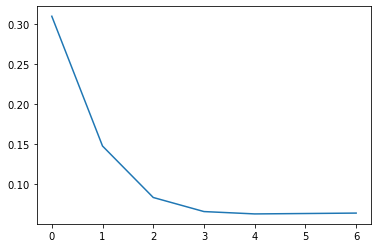

In [6]:
#plots the loss over the epochs
plt.plot(loss_tens.detach().numpy())

NameError: name 'lossf' is not defined

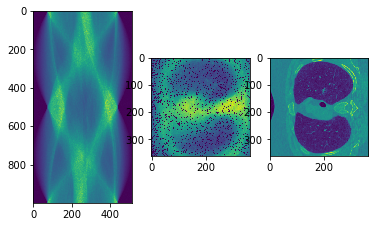

In [6]:
"""
Plots for a given index the sinogram, reconstruction and ground-truth.
"""
#model = net2
x,y = dataset.get_samples(slice(20,21,1), part="test")
prediction = model((torch.from_numpy(x).reshape(513*1000)))
plt.subplot(1, 3, 1)
plt.imshow(torch.from_numpy(x).reshape(1000,513).detach().numpy())
plt.subplot(1, 3, 2)
plt.imshow(prediction.reshape(362,362).detach().numpy())
plt.subplot(1, 3, 3)
plt.imshow(torch.from_numpy(y).reshape(362,362).detach().numpy())
print(lossf(prediction.reshape(362*362), torch.from_numpy(y).reshape(362*362)))


In [10]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as stsi
"""
Calculates the minimal and maximal pixel data and prints the PSNR and structural similarity 
"""
min, max = torch.min(prediction.reshape(362,362)), torch.max(prediction.reshape(362,362))
PSNR = psnr(torch.from_numpy(y).reshape(362,362).detach().numpy(),prediction.reshape(362,362).detach().numpy()) #the higher the better
print(min, max)
print(PSNR)
print(stsi(torch.from_numpy(y).reshape(362,362).detach().numpy(),prediction.reshape(362,362).detach().numpy()))

tensor(0.4904, grad_fn=<MinBackward1>) tensor(0.5079, grad_fn=<MaxBackward1>)
8.72158456616
0.430673129741


In [ ]:
torch.save(mynet, "Patrick-save-4x200linear.pt") #save to file

In [4]:
net2 = torch.load("Patrick-save-4x200linear.pt") #load from file

In [ ]:
"""
Tests if the loaded net works the same as the original on the given data point
"""
x = torch.from_numpy(dataset.get_samples(slice(20,21,1))[0]).reshape(513*1000)
net2(x).equal(mynet(x))

tensor(-0.2701, grad_fn=<MinBackward1>) tensor(0.2210, grad_fn=<MaxBackward1>)


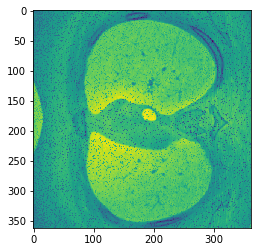

In [19]:
model=net2
x1,y1 = dataset.get_samples(slice(20,21,1), part="test")
x2,y2 = dataset.get_samples(slice(2000,2001,1), part="test")
p1 = model((torch.from_numpy(x1).reshape(513*1000)))
p2 = model((torch.from_numpy(x2).reshape(513*1000)))
plt.imshow((p1-p2).reshape(362,362).detach().numpy())
min, max = torch.min((p1-p2).reshape(362,362)), torch.max((p1-p2).reshape(362,362))
print(min, max)
plt.imshow((p1.reshape(362,362)-torch.from_numpy(y1).reshape(362,362)).reshape(362,362).detach().numpy())


# Junk

In [ ]:
'''plt.subplot(1, 3, 2)
plt.imshow(prediction)
plt.subplot(1, 3, 3)
plt.imshow(y)''''

In [ ]:
'''data=dataset.get_sample(1230)
print(torch.is_tensor(data))
data2=torch.as_tensor(data)
print(torch.is_tensor(data2))
'''
data=torch.rand(1000*513)
print(data)
print(mynet(data).size()) #131 044 = 362*362
print(dataset.get_sample(1)[0].type())

In [ ]:
from torchvision import transforms

torch.from_numpy(dataset.get_sample(1230)[0])
print(data)

In [ ]:
data=dataset.get_sample(1231)
print(torch.as_tensor(data[0][0]).size())

In [ ]:
import numpy as np
Transformer = transforms.Compose([
    transforms.ToTensor()
])
#Transformer(data[1][0])
torch.from_numpy(data[1])

In [4]:
x,y = data=dataset.get_samples(slice(0,1,1))
print(torch.from_numpy(x).reshape(513*1000))
print(torch.from_numpy(x))

tensor([-7.1809e-05, -4.1940e-05, -2.4069e-04,  ...,  8.4311e-05,
         2.3020e-04,  1.7529e-04])
tensor([[[-7.1809e-05, -4.1940e-05, -2.4069e-04,  ..., -1.0458e-04,
           1.8018e-05,  1.4489e-04],
         [-1.1648e-04,  6.9213e-05, -1.7874e-04,  ..., -1.1945e-04,
          -6.0001e-06,  1.7225e-04],
         [-2.8182e-04, -3.2965e-05, -2.0238e-04,  ..., -5.0908e-05,
          -9.5652e-05, -3.8949e-05],
         ...,
         [-3.5957e-05,  6.0031e-06, -2.3186e-04,  ...,  4.4923e-04,
          -2.3983e-05,  1.3578e-04],
         [ 3.9072e-05, -2.8475e-04, -7.4792e-05,  ..., -4.0148e-04,
          -4.4930e-05, -4.4930e-05],
         [ 3.9072e-05,  2.0577e-04,  4.1504e-04,  ...,  8.4311e-05,
           2.3020e-04,  1.7529e-04]]])


In [17]:
inp,y = dataset.get_samples(slice(20,21,1))
inp=torch.from_numpy(inp)
out=nn.Conv2d(1, 1, 100)(inp.reshape(1,1,1000,513))
out.size()

torch.Size([1, 1, 901, 414])

In [18]:
mynet2(torch.from_numpy(data).reshape(513000)).size

NameError: name 'data' is not defined

In [ ]:
data=dataset.get_samples(slice(1*batch_size,(1+1)*batch_size,1))[0][1]
print(data.shape)

In [ ]:
test_batch_size = 500
test(dataset.get_samples(slice(0,test_batch_size,1), part="test"), model, lossf)


In [ ]:
for n in range(3):
    x=10**(-n)
    print(x)
    

In [ ]:
1e-2
